## 1. Import Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler

## 2. Read the data 

In [96]:
books = pd.read_csv('/Users/belma/Documents/IRONHACK/Lessons/Week_9/Final_project/Data/books_script.csv')
books.head()

,Title,Category,Rating,Price,Availability
0,A Light in the Attic,Poetry,Three,£51.77,In stock (22 available)
1,Tipping the Velvet,Historical Fiction,One,£53.74,In stock (20 available)
2,Soumission,Fiction,One,£50.10,In stock (20 available)
3,Sharp Objects,Mystery,Four,£47.82,In stock (20 available)
4,Sapiens: A Brief History of Humankind,History,Five,£54.23,In stock (20 available)


In [97]:
books.shape

(1000, 5)

### Standardize header 

In [98]:
books.columns = books.columns.str.lower()
books

,title,category,rating,price,availability
0,A Light in the Attic,Poetry,Three,£51.77,In stock (22 available)
1,Tipping the Velvet,Historical Fiction,One,£53.74,In stock (20 available)
2,Soumission,Fiction,One,£50.10,In stock (20 available)
3,Sharp Objects,Mystery,Four,£47.82,In stock (20 available)
4,Sapiens: A Brief History of Humankind,History,Five,£54.23,In stock (20 available)
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,One,£55.53,In stock (1 available)
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,Four,£57.06,In stock (1 available)
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,Five,£16.97,In stock (1 available)
998,1st to Die (Women's Murder Club #1),Mystery,One,£53.98,In stock (1 available)


## 3. Preprocessing the data

### Handling Missing Values

In [99]:
books.isnull().sum()

title           0
category        0
rating          0
price           0
availability    0
dtype: int64

### Data Type Conversion

In [100]:
books.dtypes

title           object
category        object
rating          object
price           object
availability    object
dtype: object

In [101]:
books['rating'].unique()

array(['Three', 'One', 'Four', 'Five', 'Two'], dtype=object)

In [102]:
# Define a mapping for rating conversion
rating_mapping = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five":5
}

# Convert the "Rating" column using the mapping
books['rating'] = books['rating'].map(rating_mapping)

In [103]:
books['availability'].unique()

array(['In stock (22 available)', 'In stock (20 available)',
       'In stock (19 available)', 'In stock (18 available)',
       'In stock (17 available)', 'In stock (16 available)',
       'In stock (15 available)', 'In stock (14 available)',
       'In stock (13 available)', 'In stock (12 available)',
       'In stock (11 available)', 'In stock (10 available)',
       'In stock (9 available)', 'In stock (8 available)',
       'In stock (7 available)', 'In stock (6 available)',
       'In stock (5 available)', 'In stock (4 available)',
       'In stock (3 available)', 'In stock (2 available)',
       'In stock (1 available)'], dtype=object)

In [105]:
# Extract the number from the "Availability" column
books['availability'] = books['availability'].str.extract('(\d+)').astype(int)

In [107]:
# Remove the currency symbol and any non-numeric characters
books['price'] = books['price'].str.replace('£', '').astype(float)


In [111]:
books.head()

,title,category,rating,price,availability
0,A Light in the Attic,Poetry,3,51.77,22
1,Tipping the Velvet,Historical Fiction,1,53.74,20
2,Soumission,Fiction,1,50.10,20
3,Sharp Objects,Mystery,4,47.82,20
4,Sapiens: A Brief History of Humankind,History,5,54.23,20


### Encoding Categorical Variables

In [112]:
# Perform one-hot encoding on the "Category" column
encoded_books = pd.get_dummies(books, columns=['category'], dtype = int)
encoded_books

,title,rating,price,availability,category_Academic,category_Add a comment,category_Adult Fiction,category_Art,category_Autobiography,category_Biography,...,category_Self Help,category_Sequential Art,category_Short Stories,category_Spirituality,category_Sports and Games,category_Suspense,category_Thriller,category_Travel,category_Womens Fiction,category_Young Adult
0,A Light in the Attic,3,51.77,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tipping the Velvet,1,53.74,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Soumission,1,50.10,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sharp Objects,4,47.82,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sapiens: A Brief History of Humankind,5,54.23,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,1,55.53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",4,57.06,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
997,A Spy's Devotion (The Regency Spies of London #1),5,16.97,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,1st to Die (Women's Murder Club #1),1,53.98,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalizing Numerical Features

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the numerical columns to normalize
numerical_columns = ['price', 'rating', 'availability']

# Normalize the selected columns
books[numerical_columns] = scaler.fit_transform(books[numerical_columns])

### Feature Selection/Extraction

#### Feature Correlation analysis 

In [25]:
# Subset the dataframe with only the numeric columns

numeric_books = books[numerical_columns]
correlation_matrix = numeric_books.corr()

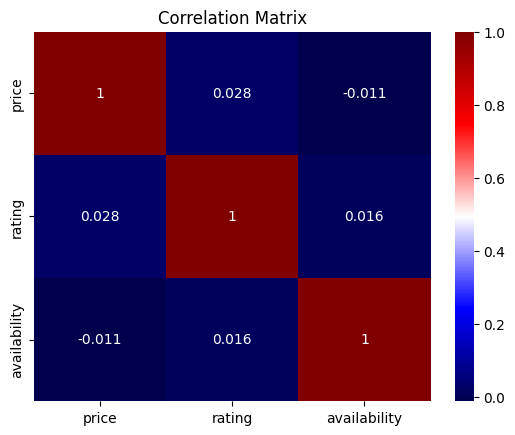

In [37]:
# Display correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='seismic')
plt.title('Correlation Matrix')
plt.show()

In [31]:
target_correlations = correlation_matrix['rating'].sort_values(ascending=False)
print(target_correlations)

rating          1.000000
price           0.028166
availability    0.016166
Name: rating, dtype: float64


#### Feature Importance:

### Handling Outliers

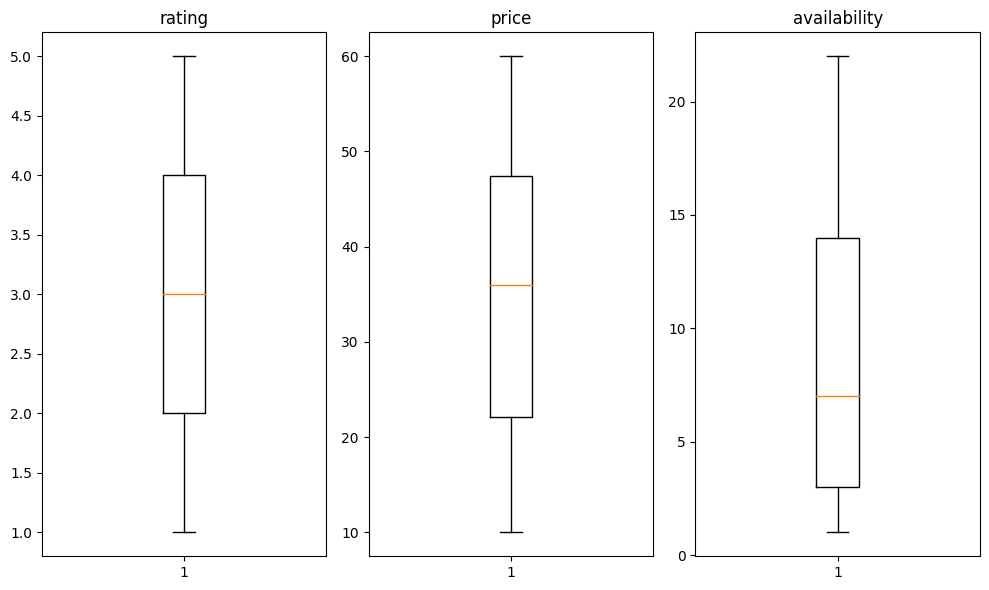

In [113]:
# Select numerical columns for box plot
numerical_columns = ['rating', 'price', 'availability']

# Create box plots for numerical columns
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    plt.boxplot(books[column])
    plt.title(column)
  
plt.tight_layout()
plt.show()

In [137]:
# Function to show outliers using boxplot
def show_outliers(dataframe):
    sns.boxplot(data=dataframe)
    # You can customize the plot as per your preference
    # For example, you can set labels and title using plt.xlabel(), plt.ylabel(), and plt.title()
    plt.show()

# Function to show correlation matrix
def show_correlation_matrix(dataframe):
    corr_matrix = dataframe.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
    plt.show()

# General preprocessing function 
def preprocess_data(dataframe):
    # Example: Handling missing values by dropping rows with missing values
    dataframe = dataframe.dropna()
    # You can add more preprocessing steps as per your requirements
    return dataframe

# Function to show distribution using histogram
def show_distribution(dataframe, column):
    sns.histplot(data=dataframe, x=column)
    plt.show()



#### Boxplot

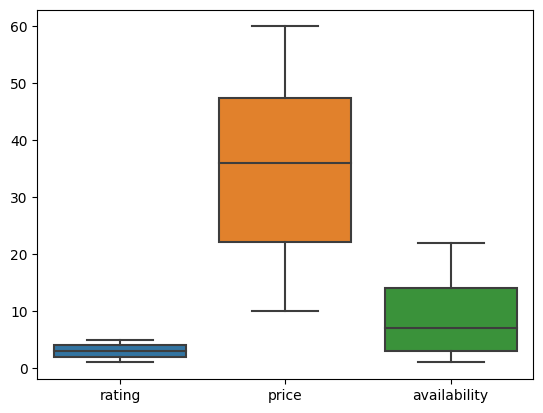

In [138]:
# Show outliers using boxplot
show_outliers(books)

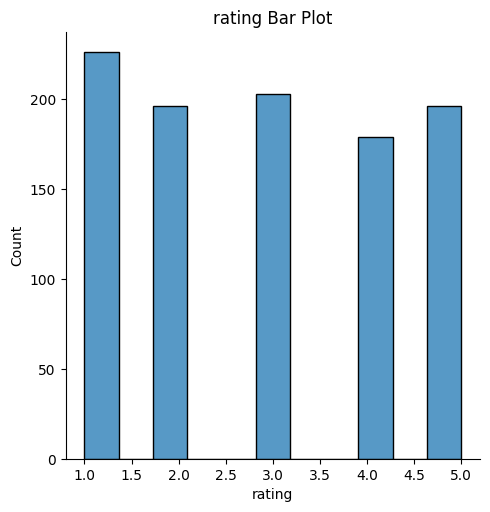

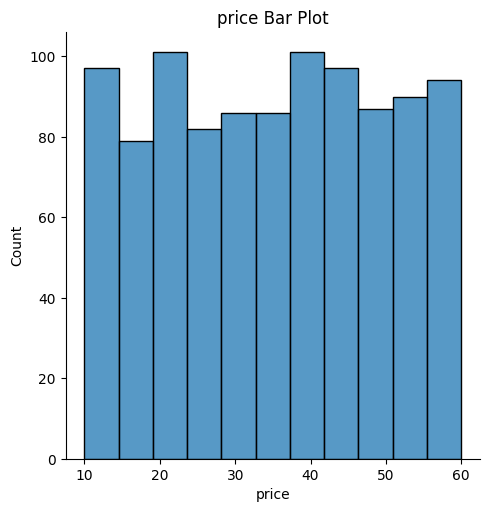

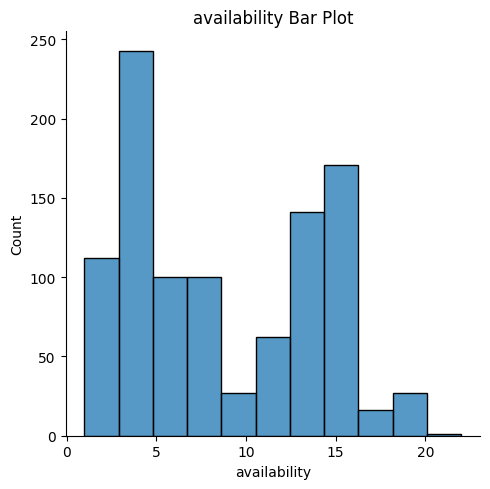

In [140]:
# Create bar plot for numerical columns

for i, column in enumerate(numerical_columns):
    #plt.subplot(1, len(numerical_columns), i+1)
    sns.displot(books[column])
    plt.title(column + ' Bar Plot')
    plt.xlabel(column)
  
plt.tight_layout()
plt.show()

In [141]:
books.describe()

,rating,price,availability
count,1000.000000,1000.00000,1000.000000
mean,2.923000,35.07035,8.585000
std,1.434967,14.44669,5.654622
min,1.000000,10.00000,1.000000
25%,2.000000,22.10750,3.000000
50%,3.000000,35.98000,7.000000
75%,4.000000,47.45750,14.000000
max,5.000000,59.99000,22.000000


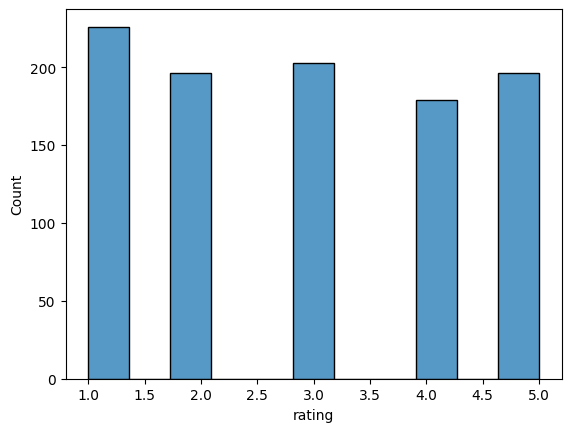

In [142]:
# Show distribution of 'rating' using histogram
show_distribution(books, 'rating')

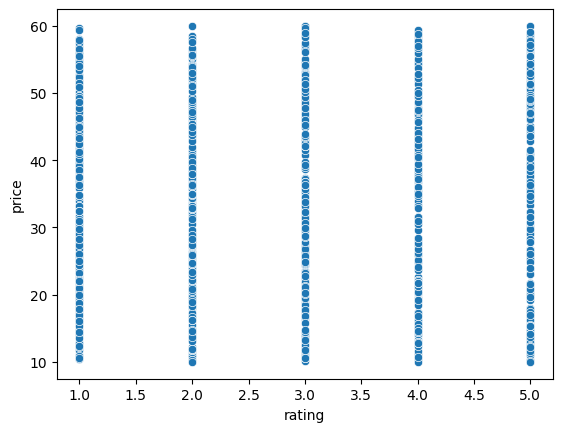

In [143]:
# Show relation between rating and price
sns.scatterplot(data=books, x='rating', y='price')
plt.show()


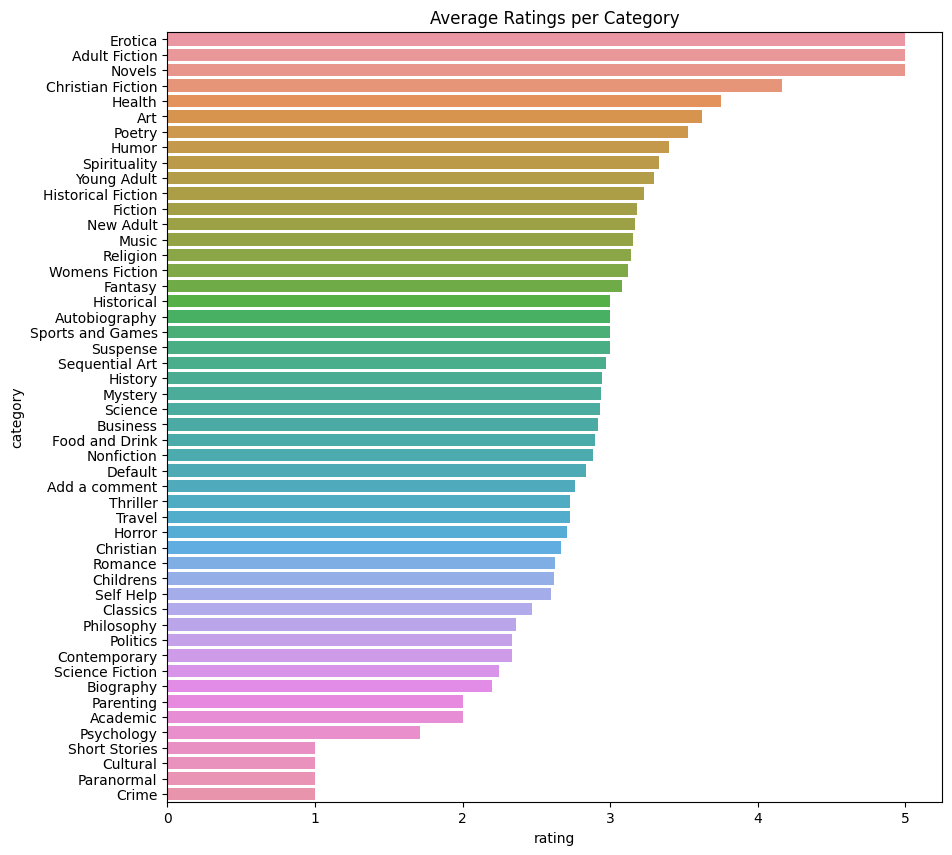

In [149]:
ratings_per_category = books.groupby('category')['rating'].mean().reset_index()

# Sort the ratings in descending order
ratings_per_category = ratings_per_category.sort_values('rating', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='rating', y='category', data=ratings_per_category)
plt.title('Average Ratings per Category')
plt.xlabel('rating')
plt.ylabel('category')

plt.show()

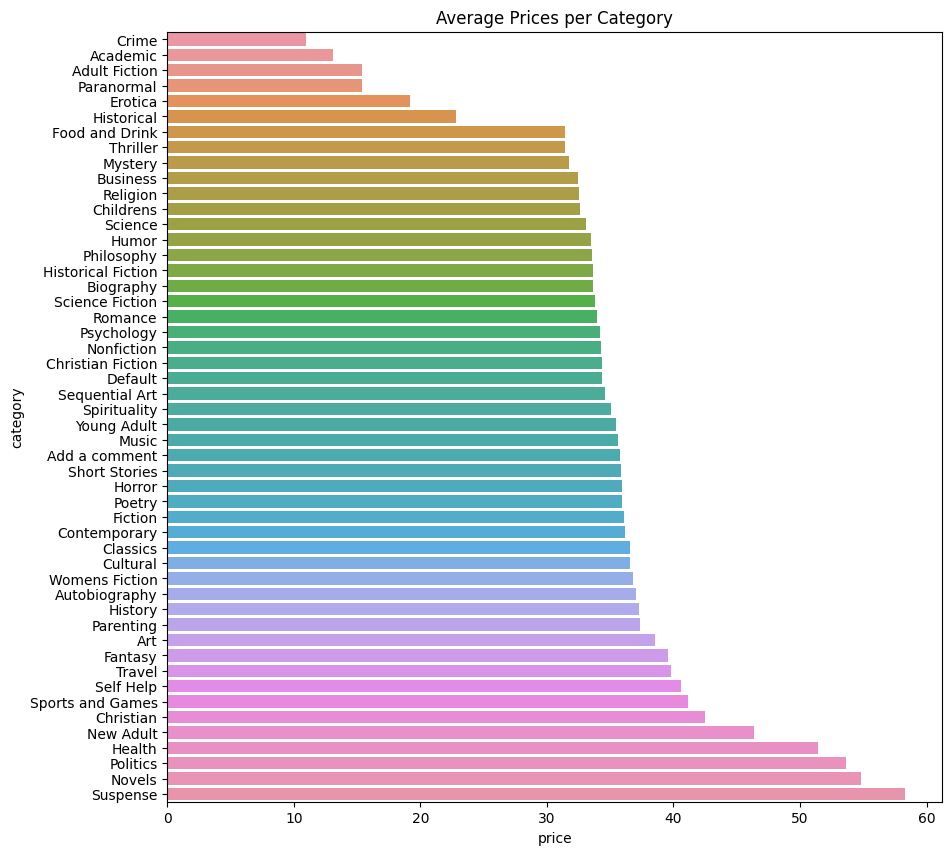

In [148]:
# Group the data by category and calculate the mean price
prices_per_category = books.groupby('category')['price'].mean().reset_index()

# Sort the prices in ascending order
prices_per_category = prices_per_category.sort_values('price', ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='price', y='category', data=prices_per_category)
plt.title('Average Prices per Category')
plt.xlabel('price')
plt.ylabel('category')

plt.show()

In [ ]:
# Count the number of reviews per book
reviews_per_book = books['title'].value_counts().reset_index()
reviews_per_book.columns = ['title', 'Review Count']

# Sort the books by review count in descending order
reviews_per_book = reviews_per_book.sort_values('Review Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Review Count', y='title', data=reviews_per_book)
plt.title('Number of Reviews per Book')
plt.xlabel('Review Count')
plt.ylabel('Book Title')
plt.show()

In [131]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
model = RandomForestRegressor()

X = books.drop('rating', axis=1)  # Features
y = books['rating']  # Target variable

# Train the model
model.fit(X, y)

# Access feature importances
feature_importances = model.feature_importances_

ValueError: could not convert string to float: 'A Light in the Attic'